In [49]:
from scipy.integrate import solve_ivp
import numpy as np

from drone_utils_2 import *

from matplotlib import pyplot as plt

In [50]:
t_init = 0
t_final = 1
t_range = np.linspace(t_init, t_final, 30)

inerx = 1
inery = 1
inerz = 1
L = 1
lam = 1
g = 9.8
m = 1

In [51]:
state_init = np.array([
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    3
])

costate_init = np.zeros(12)

state_costate_init = np.hstack([state_init, costate_init]) # We will call this `y` moving forward

In [52]:
def ode(t, y):
    state = y[:12]
    costate = y[12:]

    control = optimal_control(costate, inerx, inery, inerz, L, lam, m)


    return np.hstack([
        state_dot(state, control, inerx, inery, inerz, L, lam, g, m),
        costate_dot(
            state, costate, inerx, inery, inerz, g,
            alpha=1, # Penalizes yaw
            beta=1,  # Penalizes tilt (pitch and roll)
            gamma=1  # Penalizes position
        )
    ])

In [53]:
t_range.shape

(30,)

In [54]:
sol = solve_ivp(
    ode,
    (t_init, t_final),
    state_costate_init,
    t_eval=t_range
)

In [55]:
sol.status

0

In [56]:
sol.y.shape

(24, 30)

In [57]:
t_range.shape

(30,)

In [58]:
control = optimal_control(sol.y[12:], inerx, inery, inerz, L, lam, m)

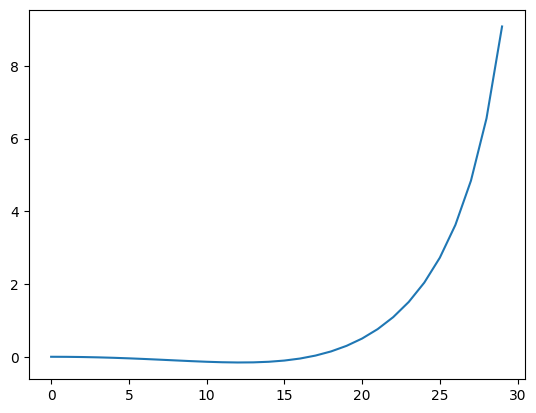

In [59]:
plt.plot(control[3])
plt.show()

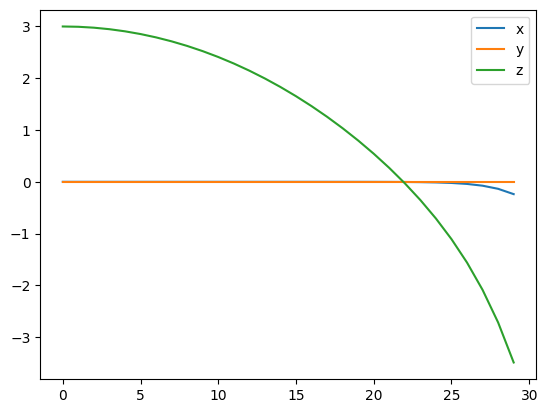

In [60]:
plt.plot(sol.y[9], label='x')
plt.plot(sol.y[10], label='y')
plt.plot(sol.y[11], label='z')
plt.legend()
plt.show()

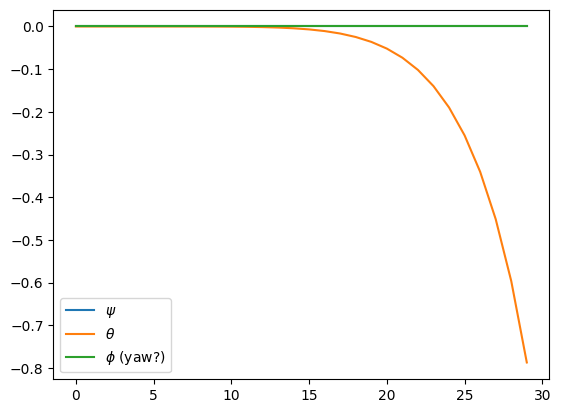

In [65]:
plt.plot(sol.y[3], label=r'$\psi$')
plt.plot(sol.y[4], label=r'$\theta$')
plt.plot(sol.y[5], label=r'$\phi$ (yaw?)')
plt.legend()
plt.show()